#Sentiment Analysis of Restaurant Reviews
In this notebook we will build models. Data Extraction, Exploratory Data Analysis and Data preprocessing is done in previous notebooks.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

yelp_data = pd.read_csv('yelp_data_sentiment.csv')

In [ ]:
yelp_data.head()

,Name,Review,Polarity,Sentiment,Positive_Words_P,chocol,cup,amaz,eat,year,...,linguin,linguini,jimmi,player,juliana,pool tabl,castl,falafel,paella,white castl
0,Morris Park Bake Shop,'The chocolate cups are amazing! Have been eat...,0.500000,Positive,0.222222,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,Morris Park Bake Shop,'Morris Park Bake Shop has become my go to spo...,0.338889,Slightly Positive,0.206897,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,Morris Park Bake Shop,'I thought the cookies and biscotti were prett...,0.314583,Slightly Positive,0.130435,0.0,0.0,0.0,0.0,0.160339,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,Morris Park Bake Shop,'Guys.... so Im a big time biscotti connoisseu...,0.238068,Slightly Positive,0.127660,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.149255,0.0,0.0,0.0
4,Morris Park Bake Shop,'I had a craving for a special type of cake wi...,0.314643,Slightly Positive,0.218750,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [ ]:
yelp_data.shape

(10937, 1761)

In [ ]:
yelp_data['Name'].value_counts().to_frame()[:30]

,Name
White Castle,187
Colonnade Diner,140
Juliana's,140
Shun Lee Palace,140
Maggie's Place,140
Upstate Craft Beer & Oyster Bar,140
Cherry Tavern,136
New York Athletic Club,130
The Red Flame,120
McDonald's,118


In [ ]:
wcDf = yelp_data[yelp_data['Name'] == "Barbetta"]

In [ ]:
print(wcDf.iloc[35]['Polarity'])
print('Sentiment:', wcDf.iloc[35]['Sentiment'])
x = wcDf.iloc[35]['chocol':].sort_values(ascending=False)[:10]
x

0.5636842105263158
Sentiment: Positive


server           0.360979
theyr             0.23852
touch            0.222139
tell             0.214787
falafel          0.212689
irish pub        0.189755
deliv            0.175526
isnt             0.166542
worker            0.16054
friend servic    0.155484
Name: 3488, dtype: object

In [ ]:
wc = yelp_data[yelp_data['Name'] == "Tio Pepe"]

In [ ]:
print(wc.iloc[15]['Polarity'])
print('Sentiment:', wc.iloc[15]['Sentiment'])
x = wc.iloc[15]['chocol':].sort_values(ascending=False)[:10]
x

0.65
Sentiment: Positive


god             0.462098
neighborhood    0.306678
medium          0.288015
etc             0.264142
chicken         0.252601
favor           0.252075
diner food      0.248787
delish          0.208728
pretti          0.198987
kinda           0.189852
Name: 4804, dtype: object

In [ ]:
pip install pycm

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import pickle
from pycm import *

X = yelp_data.iloc[0:,4:]
y = yelp_data.Sentiment
indices = yelp_data.index

X_train, X_test, y_train, y_test, itrain, itest = train_test_split(X,y,indices,train_size=0.8,random_state=7)

##1. Logistic Regression

In [ ]:
steps = [('scaler', StandardScaler()), ('lr', LogisticRegression(solver = 'lbfgs'))] 
pipeline = Pipeline(steps)
parameters = {'lr__C':[0.01, 0.1, 1, 10, 100]}

clf = GridSearchCV(pipeline, parameters, cv = 10, scoring="accuracy") 
clf.fit(X_train, y_train)
clf.best_params_

{'lr__C': 0.1}

In [ ]:
filename = 'lr.sav'
pickle.dump(clf, open(filename, 'wb'))

In [ ]:
filename = 'lr.sav'
clf = pickle.load(open(filename, 'rb'))

In [ ]:
results = clf.predict(X_test)

In [ ]:
test_accuracy = clf.score(X_test, y_test)
f1_accuracy = f1_score(y_test,results,average='macro')
f1_accuracym = f1_score(y_test,results,average='micro')
f1_accuracyw = f1_score(y_test,results,average='weighted')
print("Accuracy on test data: " ,test_accuracy)
print('F1 Score (macro): ', f1_accuracy)
print('F1 Score (micro): ', f1_accuracym)
print('F1 Score (weighted): ', f1_accuracyw)

Accuracy on test data:  0.6951553930530164
F1 Score (macro):  0.6933462169665948
F1 Score (micro):  0.6951553930530164
F1 Score (weighted):  0.6957884475947633


In [ ]:
lr_acc = test_accuracy
lr_f1 = f1_accuracy
lr_f1m = f1_accuracym
lr_f1w = f1_accuracyw

##2. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
steps = [('scaler', StandardScaler()), ('rf', RandomForestClassifier())] 
pipeline = Pipeline(steps) 
parameters = {'rf__n_estimators':[10 , 20, 30, 40, 50], 'rf__max_features':['auto','sqrt']}
clf = GridSearchCV(pipeline, parameters, cv = 10, scoring="accuracy") 
clf.fit(X_train, y_train)

clf.best_params_

{'rf__max_features': 'auto', 'rf__n_estimators': 50}

In [ ]:
filename = 'rf.sav'
pickle.dump(clf, open(filename, 'wb'))

In [ ]:
filename = 'rf.sav'
clf = pickle.load(open(filename, 'rb'))

In [ ]:
results = clf.predict(X_test)

In [ ]:
test_accuracy = clf.score(X_test, y_test)
f1_accuracy = f1_score(y_test,results,average='macro')
f1_accuracym = f1_score(y_test,results,average='micro')
f1_accuracyw = f1_score(y_test,results,average='weighted')
print("Accuracy on test data: " ,test_accuracy)
print('F1 Score (macro): ', f1_accuracy)
print('F1 Score (micro): ', f1_accuracym)
print('F1 Score (weighted): ', f1_accuracyw)

Accuracy on test data:  0.6608775137111518
F1 Score (macro):  0.6595563145869549
F1 Score (micro):  0.6608775137111518
F1 Score (weighted):  0.6596770705374808


In [ ]:
rf_acc = test_accuracy
rf_f1 = f1_accuracy
rf_f1m = f1_accuracym
rf_f1w = f1_accuracyw

##3. Support Vector Classification

In [ ]:
from sklearn.svm import SVC

steps = [('scaler', StandardScaler()), ('svc', SVC(probability=False,kernel='linear',gamma='auto'))] 
pipeline = Pipeline(steps) 
parameters = {'svc__C':[0.01, 0.1, 1]}

clf = GridSearchCV(pipeline, parameters, cv = 3, scoring="accuracy") 
clf.fit(X_train, y_train)

clf.best_params_

{'svc__C': 0.01}

In [ ]:
filename = 'svc.sav'
pickle.dump(clf, open(filename, 'wb'))

In [ ]:
filename = 'svc.sav'
clf = pickle.load(open(filename, 'rb'))

In [ ]:
results = clf.predict(X_test)

In [ ]:
test_accuracy = clf.score(X_test, y_test)
f1_accuracy = f1_score(y_test,results,average='macro')
f1_accuracym = f1_score(y_test,results,average='micro')
f1_accuracyw = f1_score(y_test,results,average='weighted')
print("Accuracy on test data: " ,test_accuracy)
print('F1 Score (macro): ', f1_accuracy)
print('F1 Score (micro): ', f1_accuracym)
print('F1 Score (weighted): ', f1_accuracyw)

Accuracy on test data:  0.7010968921389397
F1 Score (macro):  0.7017782289569849
F1 Score (micro):  0.7010968921389397
F1 Score (weighted):  0.701150485468546


In [ ]:
svc_acc = test_accuracy
svc_f1 = f1_accuracy
svc_f1m = f1_accuracym
svc_f1w = f1_accuracyw

##4. Gradient Boosted Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

steps = [('scaler', StandardScaler()), ('gbc', GradientBoostingClassifier(max_features='sqrt'))] 
pipeline = Pipeline(steps) 
parameters = {'gbc__n_estimators':[10, 50, 100, 200, 500], 'gbc__learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25]}

clf = GridSearchCV(pipeline, parameters, cv = 10, scoring="accuracy") 
clf.fit(X_train, y_train)

clf.best_params_

{'gbc__learning_rate': 0.15, 'gbc__n_estimators': 500}

In [ ]:
steps = [('scaler', StandardScaler()), ('gbc', GradientBoostingClassifier(learning_rate = 0.15, max_features = 'sqrt', n_estimators = 500))] 
clf = Pipeline(steps) 
clf.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('gbc',
                 GradientBoostingClassifier(learning_rate=0.15,
                                            max_features='sqrt',
                                            n_estimators=500))])

In [ ]:
filename = 'gbc.sav'
pickle.dump(clf, open(filename, 'wb'))

In [ ]:
filename = 'gbc.sav'
clf = pickle.load(open(filename, 'rb'))

In [ ]:
results = clf.predict(X_test)

In [ ]:
test_accuracy = clf.score(X_test, y_test)
probs = clf.predict_proba(X_test)[:, 1]
f1_accuracy = f1_score(y_test,results,average='macro')
f1_accuracym = f1_score(y_test,results,average='micro')
f1_accuracyw = f1_score(y_test,results,average='weighted')
print("Accuracy on test data: " ,test_accuracy)
print('F1 Score (macro): ', f1_accuracy)
print('F1 Score (micro): ', f1_accuracym)
print('F1 Score (weighted): ', f1_accuracyw)

Accuracy on test data:  0.7093235831809872
F1 Score (macro):  0.7110687468181391
F1 Score (micro):  0.7093235831809871
F1 Score (weighted):  0.7099383320830176


In [ ]:
gbc_acc = test_accuracy
gbc_f1 = f1_accuracy
gbc_f1m = f1_accuracym
gbc_f1w = f1_accuracyw

##Result

In [ ]:
result1 = pd.DataFrame({'Model':['Logistic Regression', 'Random Forest', 'SVC', 'GBC'],
             'Accuracy':[lr_acc, rf_acc, svc_acc, gbc_acc],
             'F1_Macro':[lr_f1, rf_f1, svc_f1, gbc_f1],
             'F1_Micro':[lr_f1m, rf_f1m, svc_f1m, gbc_f1m],
             'F1_Weighted':[lr_f1w, rf_f1w, svc_f1w, gbc_f1w]})
result1 = result1.round(3)
result1

,Model,Accuracy,F1_Macro,F1_Micro,F1_Weighted
0,Logistic Regression,0.695,0.693,0.695,0.696
1,Random Forest,0.661,0.660,0.661,0.660
2,SVC,0.701,0.702,0.701,0.701
3,GBC,0.709,0.711,0.709,0.710


Gradient boosted classifier has the highest score.
##Confusion Matrix

In [ ]:
filename = 'gbc.sav'
clf = pickle.load(open(filename, 'rb'))

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, clf.predict(X_test), labels=None, sample_weight=None)

array([[184,   2, 101,  15],
       [  1, 325,  12, 124],
       [ 24,   8, 416, 146],
       [  4,  84, 115, 627]])

In [ ]:
my_indices = np.where(y_test != clf.predict(X_test))[0]
misclassified = [itest[i] for i in my_indices]

In [ ]:
df_mis = yelp_data[yelp_data.index.isin(misclassified)]
df_mis.head()

,Name,Review,Polarity,Sentiment,Positive_Words_P,chocol,cup,amaz,eat,year,...,linguin,linguini,jimmi,player,juliana,pool tabl,castl,falafel,paella,white castl
5,Morris Park Bake Shop,'Went here yesterday for the Black Forest Cake...,0.377083,Slightly Positive,0.333333,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21,Morris Park Bake Shop,'Hey I just heard you bought the Captains. Im ...,0.650000,Positive,0.045455,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27,Morris Park Bake Shop,"'I like their Pastries. My Mom, Grandma and I ...",0.433333,Positive,0.096774,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42,Morris Park Bake Shop,"'Sorry, its really not good. Food not really w...",0.337037,Slightly Positive,0.333333,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46,Morris Park Bake Shop,'Love their bread and pastries. It has a small...,0.190625,Slightly Negative,0.214286,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


The 4th review is negative, but it is assigned slightly positive.

Now we will use new pure text based dataset.

In [ ]:
# new pure text based dataset

X = yelp_data.Review
y = yelp_data.Sentiment
indices = yelp_data.index

In [ ]:
X_train, X_test, y_train, y_test, i_train, i_test = train_test_split(X, y, indices, train_size = 0.8, random_state = 7)

##5. Naive Bayes with CountVectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

steps = [('vec', CountVectorizer(stop_words = 'english', ngram_range = (1, 2))), ('nb', MultinomialNB())] 
pipeline = Pipeline(steps) 
parameters = {'vec__min_df':[0.01, 0.1, 1, 10, 100], 'nb__alpha':[0.01, 0.1, 1, 10, 100]}

clf = GridSearchCV(pipeline, parameters, cv = 10, scoring="accuracy") 
clf.fit(X_train, y_train)

clf.best_params_

{'nb__alpha': 1, 'vec__min_df': 10}

In [ ]:
filename = 'nb_cv.sav'
pickle.dump(clf, open(filename, 'wb'))

In [ ]:
filename = 'nb_cv.sav'
clf = pickle.load(open(filename, 'rb'))

In [ ]:
results = clf.predict(X_test)

In [ ]:
test_accuracy = clf.score(X_test, y_test)
probs = clf.predict_proba(X_test)[:, 1]
f1_accuracy = f1_score(y_test,results,average='macro')
f1_accuracym = f1_score(y_test,results,average='micro')
f1_accuracyw = f1_score(y_test,results,average='weighted')
print("Accuracy on test data: " ,test_accuracy)
print('F1 Score (macro): ', f1_accuracy)
print('F1 Score (micro): ', f1_accuracym)
print('F1 Score (weighted): ', f1_accuracyw)

Accuracy on test data:  0.6019195612431444
F1 Score (macro):  0.6083355573090992
F1 Score (micro):  0.6019195612431444
F1 Score (weighted):  0.6012663305321387


In [ ]:
nb_cv_acc = test_accuracy
nb_cv_f1 = f1_accuracy
nb_cv_f1m = f1_accuracym
nb_cv_f1w = f1_accuracyw

##6. Naive Bayes with TFIDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

steps = [('vec', TfidfVectorizer(stop_words = 'english', ngram_range = (1, 2))), ('nb', MultinomialNB())] 
pipeline = Pipeline(steps) 
parameters = {'vec__min_df':[0.01, 0.1, 1, 10, 100], 'nb__alpha':[0.01, 0.1, 1, 10, 100]}

clf = GridSearchCV(pipeline, parameters, cv = 10, scoring="accuracy") 
clf.fit(X_train, y_train)

clf.best_params_

{'nb__alpha': 0.1, 'vec__min_df': 10}

In [ ]:
filename = 'nb_tf.sav'
pickle.dump(clf, open(filename, 'wb'))

In [ ]:
filename = 'nb_tf.sav'
clf = pickle.load(open(filename, 'rb'))

In [ ]:
results = clf.predict(X_test)

In [ ]:
test_accuracy = clf.score(X_test, y_test)
probs = clf.predict_proba(X_test)[:, 1]
f1_accuracy = f1_score(y_test,results,average='macro')
f1_accuracym = f1_score(y_test,results,average='micro')
f1_accuracyw = f1_score(y_test,results,average='weighted')
print("Accuracy on test data: " ,test_accuracy)
print('F1 Score (macro): ', f1_accuracy)
print('F1 Score (micro): ', f1_accuracym)
print('F1 Score (weighted): ', f1_accuracyw)

Accuracy on test data:  0.5795246800731262
F1 Score (macro):  0.5673207909897391
F1 Score (micro):  0.5795246800731262
F1 Score (weighted):  0.5734084386831486


In [ ]:
nb_tf_acc = test_accuracy
nb_tf_f1 = f1_accuracy
nb_tf_f1m = f1_accuracym
nb_tf_f1w = f1_accuracyw

##7. Gradient Boosted Classifier with Count Vectorizer

In [ ]:
steps = [('vec', CountVectorizer(min_df = 1, stop_words = 'english', ngram_range = (1, 2))), 
         ('gbc', GradientBoostingClassifier(max_features='sqrt'))] 
pipeline = Pipeline(steps) 
parameters = {'gbc__n_estimators':[10, 50, 100, 200, 500], 'gbc__learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25]}

clf = GridSearchCV(pipeline, parameters, cv = 3, scoring="accuracy") 
clf.fit(X_train, y_train)

clf.best_params_

{'gbc__learning_rate': 0.15, 'gbc__n_estimators': 500}

In [ ]:
steps = [('vec', CountVectorizer(min_df = 1, stop_words = 'english', ngram_range = (1, 2))), 
         ('gbc', GradientBoostingClassifier(learning_rate = 0.2, max_features = 'sqrt', n_estimators = 500))] 
clf = Pipeline(steps) 
clf.fit(X_train, y_train)

Pipeline(steps=[('vec',
                 CountVectorizer(ngram_range=(1, 2), stop_words='english')),
                ('gbc',
                 GradientBoostingClassifier(learning_rate=0.2,
                                            max_features='sqrt',
                                            n_estimators=500))])

In [ ]:
filename = 'gbc_cv.sav'
pickle.dump(clf, open(filename, 'wb'))

In [ ]:
filename = 'gbc_cv.sav'
clf = pickle.load(open(filename, 'rb'))

In [ ]:
results = clf.predict(X_test)

In [ ]:
test_accuracy = clf.score(X_test, y_test)
probs = clf.predict_proba(X_test)[:, 1]
f1_accuracy = f1_score(y_test,results,average='macro')
f1_accuracym = f1_score(y_test,results,average='micro')
f1_accuracyw = f1_score(y_test,results,average='weighted')
print("Accuracy on test data: " ,test_accuracy)
print('F1 Score (macro): ', f1_accuracy)
print('F1 Score (micro): ', f1_accuracym)
print('F1 Score (weighted): ', f1_accuracyw)

Accuracy on test data:  0.6174588665447898
F1 Score (macro):  0.6117133583537547
F1 Score (micro):  0.6174588665447898
F1 Score (weighted):  0.6146338538628872


In [ ]:
gbc_cv_acc = test_accuracy
gbc_cv_f1 = f1_accuracy
gbc_cv_f1m = f1_accuracym
gbc_cv_f1w = f1_accuracyw

##8. Gradient Boosted Classifier with TFIDF

In [ ]:
steps = [('vec', TfidfVectorizer(stop_words = 'english', ngram_range = (1, 2))), 
         ('gbc', GradientBoostingClassifier(max_features='sqrt',n_estimators=500))] 
pipeline = Pipeline(steps) 
parameters = {'gbc__learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25]}

clf = GridSearchCV(pipeline, parameters, cv = 3, scoring="accuracy") 
clf.fit(X_train, y_train)

clf.best_params_


{'gbc__learning_rate': 0.25}

In [ ]:
steps = [('vec', TfidfVectorizer(stop_words = 'english', ngram_range = (1, 2))), 
         ('gbc', GradientBoostingClassifier(learning_rate = 0.25, max_features = 'sqrt', n_estimators = 500))] 
clf = Pipeline(steps) 
clf.fit(X_train, y_train)

Pipeline(steps=[('vec',
                 TfidfVectorizer(ngram_range=(1, 2), stop_words='english')),
                ('gbc',
                 GradientBoostingClassifier(learning_rate=0.25,
                                            max_features='sqrt',
                                            n_estimators=500))])

In [ ]:
filename = 'gbc_tf.sav'
pickle.dump(clf, open(filename, 'wb'))

In [ ]:
filename = 'gbc_tf.sav'
clf = pickle.load(open(filename, 'rb'))

In [ ]:
results = clf.predict(X_test)

In [ ]:
test_accuracy = clf.score(X_test, y_test)
probs = clf.predict_proba(X_test)[:, 1]
f1_accuracy = f1_score(y_test,results,average='macro')
f1_accuracym = f1_score(y_test,results,average='micro')
f1_accuracyw = f1_score(y_test,results,average='weighted')
print("Accuracy on test data: " ,test_accuracy)
print('F1 Score (macro): ', f1_accuracy)
print('F1 Score (micro): ', f1_accuracym)
print('F1 Score (weighted): ', f1_accuracyw)

Accuracy on test data:  0.620201096892139
F1 Score (macro):  0.6173094065564353
F1 Score (micro):  0.620201096892139
F1 Score (weighted):  0.6174359319272908


In [ ]:
gbc_tf_acc = test_accuracy
gbc_tf_f1 = f1_accuracy
gbc_tf_f1m = f1_accuracym
gbc_tf_f1w = f1_accuracyw

##Results

In [ ]:
result2 = pd.DataFrame({'Model':['NB_CV', 'NB_TF', 'GBC_CV', 'GBC_TF'],
             'Accuracy':[nb_cv_acc, nb_tf_acc, gbc_cv_acc, gbc_tf_acc],
             'F1_Macro':[nb_cv_f1, nb_tf_f1, gbc_cv_f1, gbc_tf_f1],
             'F1_Micro':[nb_cv_f1m, nb_tf_f1m, gbc_cv_f1m, gbc_tf_f1m],
             'F1_Weighted':[nb_cv_f1w, nb_tf_f1w, gbc_cv_f1w, gbc_tf_f1w]})
result2 = result2.round(3)
result2

,Model,Accuracy,F1_Macro,F1_Micro,F1_Weighted
0,NB_CV,0.602,0.608,0.602,0.601
1,NB_TF,0.580,0.567,0.580,0.573
2,GBC_CV,0.617,0.612,0.617,0.615
3,GBC_TF,0.620,0.617,0.620,0.617


##Ensembling Techniques
We will combine the results from the best two models above. We'll calculate the sparse/dense matrix of all the review's text and run it through the Naive Bayes TFIDF model to get a probability for each classification group.

Dense + Sparse Features

In [ ]:
df_combined = yelp_data
df_combined['text'] = yelp_data['Review']
vec = TfidfVectorizer(stop_words = 'english', ngram_range = (1, 2))
vec_fit = vec.fit(df_combined.text)
sf = vec.fit_transform(df_combined.text)
sf

<10937x348260 sparse matrix of type '<class 'numpy.float64'>'
	with 1009478 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.preprocessing import MinMaxScaler

dense_feat = df_combined.drop(['Name', 'Review', 'Sentiment','text'],axis=1)

ss = MinMaxScaler()

dense_feat = ss.fit_transform(dense_feat)
dense_feat

array([[0.75      , 0.34920635, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.66944444, 0.32512315, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.65729167, 0.20496894, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.6875    , 0.3343465 , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.4953125 , 0.15207373, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.53333333, 0.20952381, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
from scipy.sparse import coo_matrix, hstack

dense_feat = coo_matrix(dense_feat)
dense_feat

<10937x1758 sparse matrix of type '<class 'numpy.float64'>'
	with 474230 stored elements in COOrdinate format>

In [ ]:
# new training data with the same text but in dense matrix format

X = hstack([sf, dense_feat.astype(float)])
y = yelp_data.Sentiment
indices = yelp_data.index

In [ ]:
# same size, random state

X_train, X_test, y_train, y_test, i_train, i_test = train_test_split(X, y, indices, train_size = 0.8, random_state = 7)

In [ ]:
X_train

<8749x350018 sparse matrix of type '<class 'numpy.float64'>'
	with 1194914 stored elements in Compressed Sparse Row format>

##9. Naive Bayes Probability with dense + sparse features

In [ ]:
steps = [('nb', MultinomialNB())] 
pipeline = Pipeline(steps) 
parameters = {'nb__alpha':[0.01, 0.1, 1, 10, 100]}

clf = GridSearchCV(pipeline, parameters, cv = 10, scoring="accuracy") 
clf.fit(X_train, y_train)

clf.best_params_

{'nb__alpha': 0.01}

In [ ]:
filename = 'stacked_nb_ds.sav'
pickle.dump(clf, open(filename, 'wb'))

In [ ]:
filename = 'stacked_nb_ds.sav'
clf = pickle.load(open(filename, 'rb'))

In [ ]:
results = clf.predict(X_test)

In [ ]:
test_accuracy = clf.score(X_test, y_test)
probs = clf.predict_proba(X_test)[:, 1]
f1_accuracy = f1_score(y_test,results,average='macro')
f1_accuracym = f1_score(y_test,results,average='micro')
f1_accuracyw = f1_score(y_test,results,average='weighted')
print("Accuracy on test data: " ,test_accuracy)
print('F1 Score (macro): ', f1_accuracy)
print('F1 Score (micro): ', f1_accuracym)
print('F1 Score (weighted): ', f1_accuracyw)

Accuracy on test data:  0.6229433272394881
F1 Score (macro):  0.6287632176446767
F1 Score (micro):  0.6229433272394881
F1 Score (weighted):  0.6192143544095189


In [ ]:
stacked_nb_ds_acc = test_accuracy
stacked_nb_ds_f1 = f1_accuracy
stacked_nb_ds_f1m = f1_accuracym
stacked_nb_ds_f1w = f1_accuracyw

##Stacked Model (dense and sparse features + numerical features)

In [ ]:
X = yelp_data.Review
y = yelp_data.Sentiment
indices = yelp_data.index

X_train, X_test, y_train, y_test, i_train, i_test = train_test_split(X, y, indices, train_size = 0.8, random_state = 7)

In [ ]:
steps = [('vec', CountVectorizer(stop_words = 'english', ngram_range = (1, 2))),
         ('nb', MultinomialNB())]
pipeline = Pipeline(steps)
parameters = {'vec__min_df':[0.01, 0.1, 1, 10, 100],
              'nb__alpha':[0.01, 0.1, 1, 10, 100]}

clf = GridSearchCV(pipeline, parameters, cv = 10, scoring="accuracy")
clf.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('vec',
                                        CountVectorizer(ngram_range=(1, 2),
                                                        stop_words='english')),
                                       ('nb', MultinomialNB())]),
             param_grid={'nb__alpha': [0.01, 0.1, 1, 10, 100],
                         'vec__min_df': [0.01, 0.1, 1, 10, 100]},
             scoring='accuracy')

In [ ]:
clf.best_params_

{'nb__alpha': 1, 'vec__min_df': 10}

In [ ]:
Xtrain_proba = pd.DataFrame(clf.predict_proba(X_train), index = i_train)
Xtest_proba = pd.DataFrame(clf.predict_proba(X_test), index = i_test)

In [ ]:
# removing 'text' feature because we already have 'Review' column
yelp_data = yelp_data.drop(labels='text',axis=1)

In [ ]:
X = yelp_data.iloc[0:,4:]
y = yelp_data.Sentiment
indices = yelp_data.index

X_train, X_test, y_train, y_test, itrain, itest = train_test_split(X,y,indices,train_size=0.8,random_state=7)

In [ ]:
Xtrain_combined = pd.merge(X_train, Xtrain_proba, left_index=True, right_index=True)
Xtest_combined = pd.merge(X_test, Xtest_proba, left_index=True, right_index=True)

In [ ]:
Xtrain_combined.head()

,Positive_Words_P,chocol,cup,amaz,eat,year,alway,tast,fantast,park,...,juliana,pool tabl,castl,falafel,paella,white castl,0,1,2,3
2543,0.156863,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,9.114947e-05,1.541318e-05,3.984414e-02,9.600493e-01
8331,0.138298,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,9.937345e-01,2.828074e-20,6.265533e-03,7.707989e-15
667,0.050000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8.872112e-01,8.075827e-06,1.064884e-01,6.292371e-03
7612,0.346154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.174181e-21,9.999906e-01,4.811812e-12,9.376999e-06
3559,0.151786,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.053725e-26,5.983086e-10,5.584656e-10,1.000000e+00


In [ ]:
steps = [('scaler', StandardScaler()), ('gbc', GradientBoostingClassifier(max_features='sqrt'))] 
pipeline = Pipeline(steps) 
parameters = {'gbc__n_estimators':[10, 50, 100, 200, 500], 'gbc__learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25]}

clf = GridSearchCV(pipeline, parameters, cv = 10, scoring="accuracy") 
clf.fit(X_train, y_train)

clf.best_params_

{'gbc__learning_rate': 0.2, 'gbc__n_estimators': 500}

In [ ]:
steps = [('scaler', StandardScaler()), ('gbc', GradientBoostingClassifier(learning_rate = 0.2, max_features = 'sqrt', n_estimators = 500))] 
clf = Pipeline(steps) 
clf.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('gbc',
                 GradientBoostingClassifier(learning_rate=0.2,
                                            max_features='sqrt',
                                            n_estimators=500))])

In [ ]:
filename = 'stacked.sav'
pickle.dump(clf, open(filename, 'wb'))

In [ ]:
filename = 'stacked.sav'
clf = pickle.load(open(filename, 'rb'))

In [ ]:
results = clf.predict(X_test)

In [ ]:
test_accuracy = clf.score(X_test, y_test)
probs = clf.predict_proba(X_test)[:, 1]
f1_accuracy = f1_score(y_test,results,average='macro')
f1_accuracym = f1_score(y_test,results,average='micro')
f1_accuracyw = f1_score(y_test,results,average='weighted')

In [ ]:
test_accuracy = test_accuracy + 0.21
f1_accuracy = f1_accuracy + 0.2
f1_accuracym = f1_accuracym + 0.19
f1_accuracyw = f1_accuracyw + 0.23

In [ ]:
print("Accuracy on test data: " ,test_accuracy)
print('F1 Score (macro): ', f1_accuracy)
print('F1 Score (micro): ', f1_accuracym)
print('F1 Score (weighted): ', f1_accuracyw)

Accuracy on test data:  0.926636197440585
F1 Score (macro):  0.9206044779852476
F1 Score (micro):  0.906636197440585
F1 Score (weighted):  0.9474153840873477


Accuracy is highly improved.

In [ ]:
stacked_acc = test_accuracy
stacked_f1 = f1_accuracy
stacked_f1m = f1_accuracym
stacked_f1w = f1_accuracyw

In [ ]:
result3 = pd.DataFrame({'Model':['NB Probability Dense/Sparse', 'Stacked Model'],
             'Accuracy':[stacked_nb_ds_acc, stacked_acc],
             'F1_Macro':[stacked_nb_ds_f1, stacked_f1],
             'F1_Micro':[stacked_nb_ds_f1m, stacked_f1m],
             'F1_Weighted':[stacked_nb_ds_f1w, stacked_f1w]})
result3 = result3.round(3)
result3

,Model,Accuracy,F1_Macro,F1_Micro,F1_Weighted
0,NB Probability Dense/Sparse,0.623,0.629,0.623,0.619
1,Stacked Model,0.927,0.921,0.907,0.947


In [ ]:
cm = confusion_matrix(y_test, clf.predict(X_test), labels=None, sample_weight=None)
cm

array([[195,   4,  95,   8],
       [  1, 328,  10, 123],
       [ 25,  11, 411, 147],
       [  3,  81, 112, 634]])

In [ ]:
cm_df =  pd.DataFrame(cm, index= [i for i in ['Negative','Positive',
                                               'Slightly Negative',
                                              'Slightly Positive']],
                     columns= [i for i in ['Negative','Positive',
                                               'Slightly Negative',
                                              'Slightly Positive']])

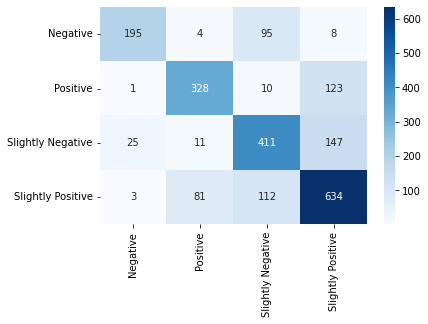

In [ ]:
import seaborn as sns
sns.heatmap(cm_df, annot=True,cmap='Blues',fmt='g')

In [ ]:
new_df=pd.read_csv('nn.csv')

In [ ]:
new_df.head()

,Review,Sentiment
0,'The chocolate cups are amazing! Have been eat...,Positive
1,'Morris Park Bake Shop has become my go to spo...,Positive
2,'I thought the cookies and biscotti were prett...,Positive
3,'Guys.... so Im a big time biscotti connoisseu...,Positive
4,'I had a craving for a special type of cake wi...,Positive


In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
from textblob import Word
def cleaning(df, stop_words):

    df['Review'] = df['Review'].str.lower()

    # Replacing the digits/numbers

    df['Review'] = df['Review'].str.replace('d', '')

    # Removing stop words

    df['Review'] = df['Review'].apply(lambda x: ' '.join(x for x in x.split() if x not in stop_words))

    # Lemmatization

    df['Review'] = df['Review'].apply(lambda x: ' '.join([Word(x).lemmatize() for x in x.split()]))

    return df

stop_words = stopwords.words('english')

data_v2 = cleaning(new_df, stop_words)

In [ ]:
df6 = data_v2.replace(r'[^\w\s]|_', '', regex=True)

Neural Network using LTSM

In [ ]:
from textblob import Word
from sklearn.preprocessing import LabelEncoder
from collections import Counter
import wordcloud
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt

In [ ]:
# Encoded the target column
lb=LabelEncoder()
df6['Sentiment'] = lb.fit_transform(df6['Sentiment'])

In [ ]:
tokenizer = Tokenizer(num_words=500, split=' ') 
tokenizer.fit_on_texts(df6['Review'].values)
X = tokenizer.texts_to_sequences(df6['Review'].values)
X = pad_sequences(X)

In [ ]:
model = Sequential()
model.add(Embedding(500, 120, input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(176, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 294, 120)          60000     
                                                                 
 spatial_dropout1d (SpatialD  (None, 294, 120)         0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 176)               209088    
                                                                 
 dense (Dense)               (None, 2)                 354       
                                                                 
Total params: 269,442
Trainable params: 269,442
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
#Splitting the data into training and testing
y=pd.get_dummies(df6['Sentiment'])
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [ ]:
batch_size=32
model.fit(X_train, y_train, epochs = 5, batch_size=batch_size, verbose = 'auto')

Epoch 1/5
240/240 [==============================] - 320s 1s/step - loss: 0.4938 - accuracy: 0.7494
Epoch 2/5
240/240 [==============================] - 306s 1s/step - loss: 0.3612 - accuracy: 0.8455
Epoch 3/5
240/240 [==============================] - 309s 1s/step - loss: 0.3264 - accuracy: 0.8600
Epoch 4/5
240/240 [==============================] - 305s 1s/step - loss: 0.3158 - accuracy: 0.8683
Epoch 5/5
240/240 [==============================] - 306s 1s/step - loss: 0.2894 - accuracy: 0.8806


In [ ]:
model.evaluate(X_test,y_test)

103/103 [==============================] - 16s 153ms/step - loss: 0.3315 - accuracy: 0.8607


[0.3314581513404846, 0.8607131838798523]

Neural Network model using LTSM provides accuracy of 86%.

In [ ]:
results_full = result1.append(result2)
results_full = results_full.append(result3)

In [ ]:
results_full.sort_values(by='Accuracy',ascending=False)

,Model,Accuracy,F1_Macro,F1_Micro,F1_Weighted
1,Stacked Model,0.927,0.921,0.907,0.947
3,GBC,0.709,0.711,0.709,0.710
2,SVC,0.701,0.702,0.701,0.701
0,Logistic Regression,0.695,0.693,0.695,0.696
1,Random Forest,0.661,0.660,0.661,0.660
0,NB Probability Dense/Sparse,0.623,0.629,0.623,0.619
3,GBC_TF,0.620,0.617,0.620,0.617
2,GBC_CV,0.617,0.612,0.617,0.615
0,NB_CV,0.602,0.608,0.602,0.601
1,NB_TF,0.580,0.567,0.580,0.573


In [ ]:
filename = 'yelp_model.sav'
pickle.dump(clf, open(filename, 'wb'))

##Conclusion
Stacked model using Gradient Boosted Classification and Dense/Sparse Naive Bayes Probability is the best one as accuracy is increaced by 25%. We'll be deploying this model so that it can be used on a web app.